# Logistic Regression - One vs Rest

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Loading the Iris dataset <br>

In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


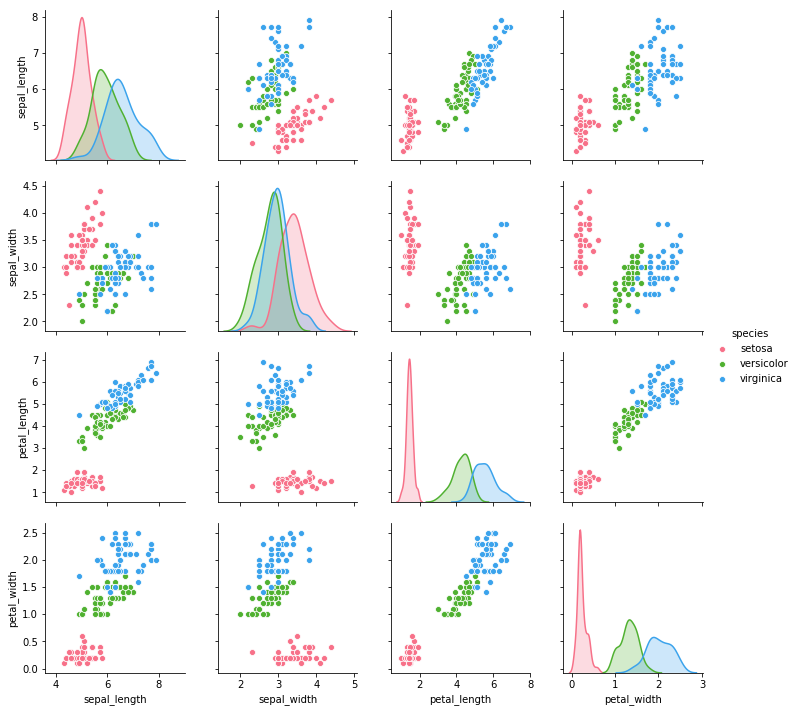

In [3]:
sns.pairplot(data, hue='species', palette='husl')

### Splitting the data

In [4]:
def species_to_numeric(species):
    """ Will convert a string to numerical class """
    if species == 'setosa':
        return 0
    elif species == 'versicolor':
        return 1
    else: 
        return 2

In [5]:
X = np.array(data.iloc[:,:-1])
X = np.c_[X,np.ones(len(X))] # Adding bias
y = np.array(data.iloc[:,-1].apply(species_to_numeric))

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                    train_size=0.7, test_size=0.3,random_state=1)

### Important Functions <br>

<div><b>predict:</b> If the probability of y=1 is higher than 50% then we'll say it's a positive class,
       otherwise it's a negative class. This can be changed to whatever value we desire, 
       although it has obvious implications.</div> <br>
       
<div><b>sigmoid:</b> Will squish values into a [0,1] interval that will be the probability of
       the example being a positive class. As we can see by the graph, the probability is going to be higher than 50% when the input is positive</div>

Text(0.5, 0, 'Input')

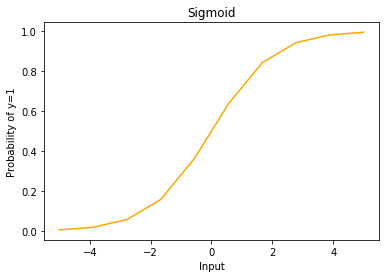

In [6]:
def predict(x):
    """ Predicts a class given a probability """
    
    return 1.0 if x>0.5 else 0.0

def sigmoid(x):
    """Will squish values into a [0,1] interval that will be the probability of
       the example being a positive class"""
    
    return 1/(1+np.exp(-x))

# Plotting the sigmoid function
plt.plot(np.linspace(-5,5,10),sigmoid(np.linspace(-5,5,10)), c='orange')
plt.title("Sigmoid")
plt.ylabel("Probability of y=1")
plt.xlabel("Input")

### The cost function<br>
<img src='https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_cost_function_vectorized.png'> <br>
<div>When the example is y=1, the second half of the equation becomes 0, so what matters is - log(hypothesis), which is the first graph. The cost will be higher as the hypothesis outputs lower values (low probability of the example being y=1). The same thing happens when y=0, but now the first part of the equation becomes 0, so what matters is -log(1-hypothesis), which is the second graph. Now, the cost will be higher as the output is higher, since now it's 1-hypothesis, so a 0.8 value means it thinks the chance of the exemple being y=0 is 0.2. That will give a high cost.</div> <b>Obs: Classes must either be y=0 or y=1. Other values won't work</b><br>
<b>Obs2: The cost will aways be a positive number if everything is correct</b>

Text(0.5, 1.0, '-log(1-x)')

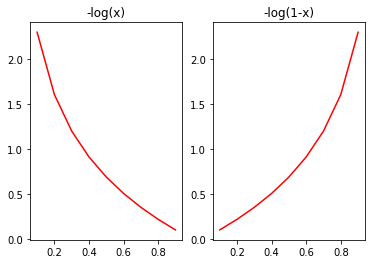

In [7]:
def cost(hyp, y):
    """ Will have a high value if the error is large """
    return (-y @ np.log(hyp) - (1-y) @ np.log(1-hyp))/len(y)


# Plotting both functions
x = np.linspace(0.1,0.9,9)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(x,-np.log(x), c='r')
ax[0].set_title("-log(x)")

ax[1].plot(x,-np.log(1-x), c='r')
ax[1].set_title("-log(1-x)")

### Logistic Regression <br>
<div> We must define a constant alpha as our learning rate. It must be a value between (0.0, 1.0). The smaller the learning rate, the better are the chances of the algorithm converging, because it's gonna take smaller steps towards it's objective, but the training is also slowed. A large value for the learning rate might cause the algorithm to never converge.</div>

In [8]:
def logistic_regression(X, y, theta=np.random.uniform(-1,1,X.shape[1]),
                        alpha=0.1, squish=sigmoid,cost=cost,
                        maxit=1000, threshold=1e-2):
    """ Uses gradient descent to update thetas """
    
    m = len(X)
    total_cost = threshold + 1 # Guarantees that it will enter the loop on the first time
    costs = [] # Will be used to plot the cost on every iteration
    epoch = 0
    
    while epoch < maxit and total_cost > threshold:
        total_cost = 0 
        
        hypothesis = squish(X @ theta)
        total_cost = cost(hypothesis, y)
        error = hypothesis - y
        
        theta -= alpha/m * (error @ X) # Updating thetas 
        
        costs.append(total_cost)
            
        epoch += 1
    
    print("Final Cost:", total_cost)
    plt.plot(range(epoch),costs)
    plt.title('Cost by iteration')
    plt.xlabel('iteration')
    plt.ylabel('cost')
    
    print("Trained Thetas:",theta, "\n")
    return theta

### Training 3 different classifiers, one for each class <br>

<div> We'll train one classifier that knows how to separate class 0 from the other classes, another classifier to separate class 1 from the rest, then finally a third classifier to separate class 3 from the rest.</div>

<img src='https://slideplayer.com/slide/8945600/27/images/42/One-vs-All+%28one-vs-rest%29.jpg' width="300">

In [9]:
def segregate(data, positive):
    """ Separates one class from the other classes """
    aux = []
    if positive == 0:
        for example in data:
            if example == 0:
                aux.append(1)
            else:
                aux.append(0)
                
    elif positive == 1:
        for example in data:
            if example == 1:
                aux.append(1)
            else:
                aux.append(0)
                
    elif positive == 2:
        for example in data:
            if example == 2:
                aux.append(1)
            else:
                aux.append(0)
                
    return np.array(aux)

Final Cost: 0.009990521705043741
Trained Thetas: [ 0.10333767  2.11371799 -2.6823785  -0.61705791  0.89945965] 

Final Cost: 0.4861167029784379
Trained Thetas: [ 0.70200875 -2.05564299  0.37111728 -1.27107127  1.27196687] 

Final Cost: 0.12320699701970995
Trained Thetas: [-2.30824532 -1.48919425  2.93772537  3.17049315 -0.77742106] 



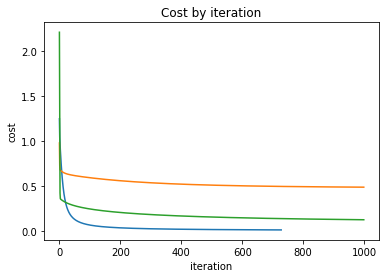

In [10]:
thetas = []
for i in range(len(data['species'].unique())):
    thetas.append(logistic_regression(X_train,segregate(y_train,positive=i),np.random.uniform(-1,1,X.shape[1])))

<div>Our prediction will be the classifier which outputs the highest probability for the example.</div>

In [11]:
# Gets all predictions from all classifiers on all examples

predicts = []
for i in range(len(X_test)):
    predict = []
    for j in range(len(thetas)):
        predict.append(sigmoid(X_test[i] @ thetas[j]))
    predicts.append(predict)

<div>In this first example, the first classifier has the highest output, so we'll classify this example as a class 0</div>

In [12]:
print("Probabilities:",predicts[0], "\nHighest probability:", np.argmax(predicts[0]))

Probabilities: [0.9986568911725395, 0.06369543955997922, 1.1681761279638668e-07] 
Highest probability: 0


In [13]:
# Gets the final prediction

y_pred = []
for predictions in predicts:
    y_pred.append(np.argmax(predictions))

y_pred = np.array(y_pred)

### Testing the model

In [14]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [15]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  3],
       [ 0,  0, 13]])

<div> Using sklearn's logistic regressor to compare my results.</div>

In [16]:
clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9777777777777777

In [17]:
confusion_matrix(clf.predict(X_test),y_test)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]])

In [18]:
# Sklearn's thetas
clf.coef_

array([[-4.33611763e-01,  7.56838956e-01, -2.24377468e+00,
        -9.29831401e-01, -4.65347906e-05],
       [ 5.81788379e-01, -5.36258650e-01, -1.30670007e-01,
        -7.99007465e-01,  1.80495635e-05],
       [-1.48176616e-01, -2.20580306e-01,  2.37444469e+00,
         1.72883887e+00,  2.84852271e-05]])

In [19]:
# My thetas
thetas

[array([ 0.10333767,  2.11371799, -2.6823785 , -0.61705791,  0.89945965]),
 array([ 0.70200875, -2.05564299,  0.37111728, -1.27107127,  1.27196687]),
 array([-2.30824532, -1.48919425,  2.93772537,  3.17049315, -0.77742106])]